In [68]:
# Importando bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud

In [69]:
# Função de limpeza de texto para remover URLs, menções, hashtags, caracteres especiais e números
def clean_text(text):
    if pd.isnull(text):
        return text
    text = re.sub(r'http\S+', '', text)  # Remover URLs
    text = re.sub(r"www.\S+",'', text)  # Remover URLs
    text = re.sub('@[A-Za-z0-9_]+','',text)  # Remover menções
    text = re.sub('#[A-Za-z0-9_]+','',text)  # Remover hashtags
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remover caracteres especiais e números
    text = re.sub(r'\s+', ' ', text).strip()  # Remover espaços extras
    return text

In [70]:
# Carregando o dataset
df = pd.read_csv('../data/dataset.csv')

In [71]:
# Exibindo as primeiras linhas para entender a estrutura e conteúdo do dataset
df.head()

,Text,Language,Label
0,@Charlie_Corley @Kristine1G @amyklobuchar @Sty...,en,litigious
1,#BadBunny: Como dos gotas de agua: Joven se di...,es,negative
2,https://t.co/YJNiO0p1JV Flagstar Bank disclose...,en,litigious
3,Rwanda is set to host the headquarters of Unit...,en,positive
4,OOPS. I typed her name incorrectly (today’s br...,en,litigious


### A análise inicial do dataset

O conjunto de dados contém 937.854 linhas e 3 colunas: `Text`, `Language` e `Label`. A coluna `Text` contém o conteúdo dos tweets, incluindo URLs, menções e hashtags. A coluna `Language` indica o idioma em que o tweet foi escrito, utilizando códigos de idioma. A coluna `Label` classifica os tweets em categorias como "litigious", "negative", "positive" e "uncertainty".

In [72]:
# Informações atualizadas do dataset antes da limpeza
info = {
    "Quantidade de Linhas": df.shape[0],
    "Quantidade de Colunas": df.shape[1],
    "Colunas": df.columns.tolist(),
    "Quantidade de Valores Únicos por Coluna": df.nunique().to_dict(),
    "Quantidade de Dados Faltantes por Coluna": df.isnull().sum().to_dict()
}

for key, value in info.items():
    print(key + ':', value)

Quantidade de Linhas: 937854
Quantidade de Colunas: 3
Colunas: ['Text', 'Language', 'Label']
Quantidade de Valores Únicos por Coluna: {'Text': 929544, 'Language': 72, 'Label': 4}
Quantidade de Dados Faltantes por Coluna: {'Text': 0, 'Language': 23, 'Label': 0}


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 937854 entries, 0 to 937853
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   Text      937854 non-null  object
 1   Language  937831 non-null  object
 2   Label     937854 non-null  object
dtypes: object(3)
memory usage: 21.5+ MB


In [74]:
# Verificando registros com base no idioma com mais de três caracteres
df_language = df[df['Language'].str.len() > 3]
df_language['Language'].value_counts()

Language
[Photo(previewUrl='https://pbs.twimg.com/media/FWV94O7UEAAjMOi?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FWV94O7UEAAjMOi?format=jpg&name=large')]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                1
[Photo(previewUrl='https://pbs.twimg.com/media/FWWBzWTXkAAyZqm?format=jpg&name=small', fullUrl='https://pbs.twimg.com/media/FWWBzWTXkAAyZqm?format=jpg&name=large')]     

In [109]:
# Contagem de registros com base no idioma
df['Language'].value_counts()

Language
en     867178
fr      13066
es      11244
pt      10256
ja       8135
        ...  
am          5
bg          4
si          3
ckb         2
sd          1
Name: count, Length: 64, dtype: int64

### Etapa 1: Limpeza e Preparação dos Dados

In [76]:
# Aplicando a limpeza de texto na coluna 'Language'. Foram encontrados links de imagens, o que não é relevante para a análise
df['Language'] = df['Language'].astype(str).apply(clean_text)

df.drop(df[df['Language'].astype(str).apply(lambda x: len(x) > 3)].index, inplace=True)

In [77]:
# Aplicando a limpeza de texto na coluna 'Text' para remover URLs, menções, hashtags, caracteres especiais e números
df['Clean_Text'] = df['Text'].astype(str).apply(clean_text)

In [78]:
# Tratando valores ausentes na coluna 'Language', preenchendo com vazio ('') para evitar problemas na análise de texto
df['Language'].fillna('', inplace=True)

C:\Users\halex\AppData\Local\Temp\ipykernel_23788\3842172756.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Language'].fillna('', inplace=True)


In [79]:
# Remoção de duplicatas
df.drop_duplicates(inplace=True)

In [80]:
# Feature Engineering: Criando novas features com base no texto limpo 
# Contagem de palavras e comprimento do texto
df['Text_Length'] = df['Clean_Text'].apply(len)
df['Word_Count'] = df['Clean_Text'].apply(lambda x: len(x.split()))  

In [81]:
# Informações atualizadas do dataset após a limpeza e tratamento dos dados
info = {
    "Quantidade de Linhas": df.shape[0],
    "Quantidade de Colunas": df.shape[1],
    "Colunas": df.columns.tolist(),
    "Quantidade de Valores Únicos por Coluna": df.nunique().to_dict(),
    "Quantidade de Dados Faltantes por Coluna": df.isnull().sum().to_dict()
}

for key, value in info.items():
    print(key + ':', value)

Quantidade de Linhas: 932871
Quantidade de Colunas: 6
Colunas: ['Text', 'Language', 'Label', 'Clean_Text', 'Text_Length', 'Word_Count']
Quantidade de Valores Únicos por Coluna: {'Text': 929535, 'Language': 64, 'Label': 4, 'Clean_Text': 871018, 'Text_Length': 290, 'Word_Count': 71}
Quantidade de Dados Faltantes por Coluna: {'Text': 0, 'Language': 0, 'Label': 0, 'Clean_Text': 0, 'Text_Length': 0, 'Word_Count': 0}


### Etapa 2: Análise Univariada

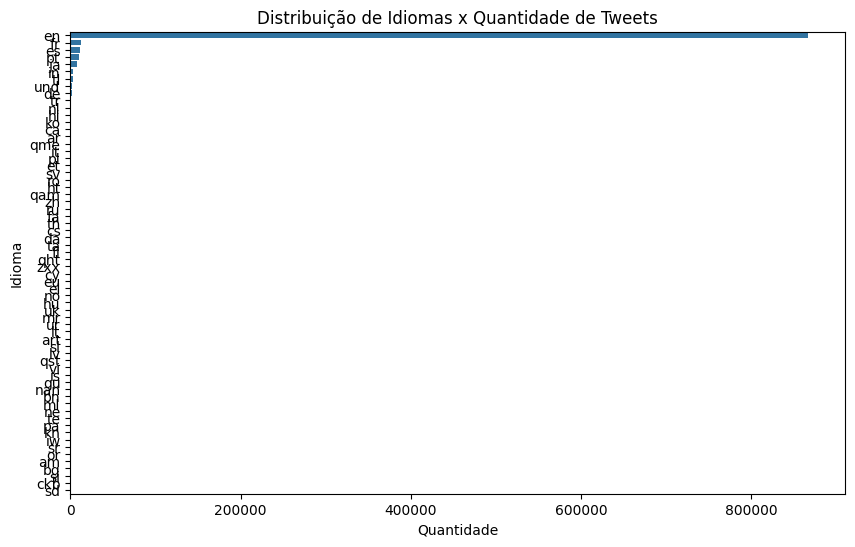

In [82]:
# Distribuição de idiomas x quantidade de tweets
plt.figure(figsize=(10, 6))
sns.countplot(y='Language', data=df, order = df['Language'].value_counts().index)
plt.title('Distribuição de Idiomas x Quantidade de Tweets')
plt.xlabel('Quantidade')
plt.ylabel('Idioma')
plt.show()

O gráfico de barras acima mostra a distribuição de idiomas no conjunto de dados. A maioria dos tweets está em inglês (en), seguido por francês (fr), espanhol (es) e português (pt).

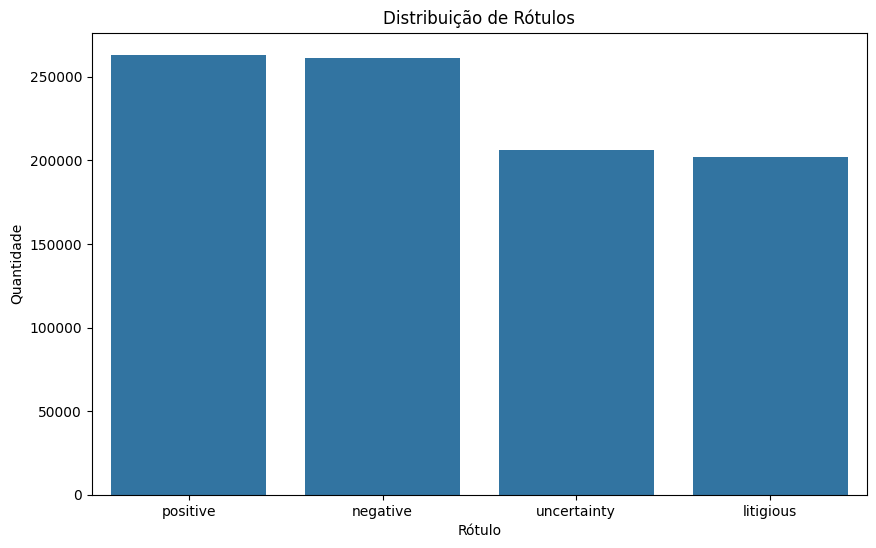

In [83]:
# Distribuição de rótulos
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df, order = df['Label'].value_counts().index)
plt.title('Distribuição de Rótulos')
plt.xlabel('Rótulo')
plt.ylabel('Quantidade')
plt.show()

Este gráfico de barras apresenta a distribuição dos rótulos no conjunto de dados. Observamos que os rótulos estão relativamente equilibrados, com uma quantidade semelhante de tweets classificados como "positive", "negative", "litigious" e "uncertainty".

### Etapa 3: Análise Bivariada

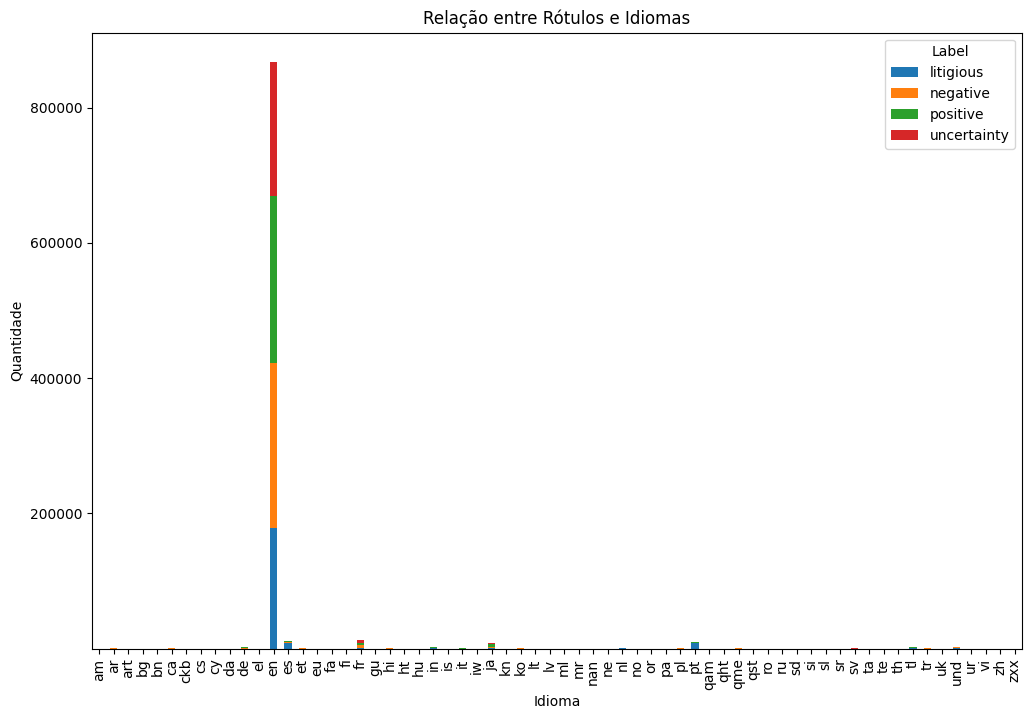

In [84]:
# Relação entre rótulos e idiomas
ct = pd.crosstab(df['Language'], df['Label'])
ct.plot(kind='bar', figsize=(12, 8), stacked=True)
plt.title('Relação entre Rótulos e Idiomas')
plt.xlabel('Idioma')
plt.ylabel('Quantidade')
plt.show()

Este gráfico de barras empilhadas nos permite explorar a relação entre os rótulos e os idiomas. Podemos observar que alguns idiomas apresentam uma distribuição mais equilibrada de rótulos, enquanto outros têm uma predominância de um ou dois rótulos específicos

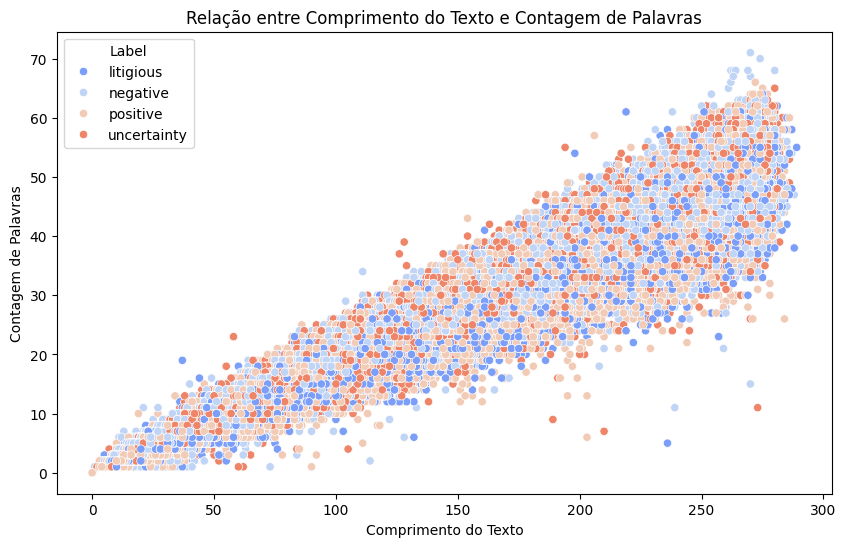

In [85]:
# Correlação entre o comprimento do texto e a contagem de palavras
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Text_Length', y='Word_Count', hue='Label', data=df, palette='coolwarm')
plt.title('Relação entre Comprimento do Texto e Contagem de Palavras')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Contagem de Palavras')
plt.show()



O gráfico de dispersão acima mostra a relação entre o comprimento do texto limpo e a contagem de palavras, com os pontos coloridos de acordo com o rótulo. É possível observar uma correlação positiva entre essas duas variáveis, o que é esperado, pois textos mais longos tendem a ter mais palavras.

### Análise de Anomalias e Inconsistências

Para identificar outliers no comprimento dos textos, utilizamos os quantis 0.05 e 0.95 como limites inferior e superior, respectivamente. Essa abordagem é comum para remover os casos extremos, que podem afetar negativamente a análise.

Identificamos 88.239 outliers com base no comprimento do texto. Ao analisar a distribuição desses outliers por rótulo, observamos que a maioria pertence às categorias "negative" e "positive".

Posteriormente, removemos os outliers do conjunto de dados, mantendo apenas 5% dos dados com menor e maior comprimento de texto.

In [86]:
# Identificando outliers no comprimento do texto com base 
outliers = df[(df['Text_Length'] > df['Text_Length'].quantile(0.95)) | (df['Text_Length'] < df['Text_Length'].quantile(0.05))]
print("Outliers identificados:", len(outliers))

Outliers identificados: 88239


In [87]:
# Quantidade de outliers por rótulo
outliers['Label'].value_counts()

Label
negative       29282
positive       28636
litigious      17628
uncertainty    12693
Name: count, dtype: int64

In [88]:
# Removendo outliers com base no comprimento do texto (5% dos dados com menor e maior comprimento) para evitar viés na análise
df_filtered = df[~((df['Text_Length'] > df['Text_Length'].quantile(0.95)) | (df['Text_Length'] < df['Text_Length'].quantile(0.05)))]

In [89]:
df_filtered.count()

Text           844632
Language       844632
Label          844632
Clean_Text     844632
Text_Length    844632
Word_Count     844632
dtype: int64

### Análise de Balanceamento de Rótulos por Idioma

Realizamos uma análise detalhada do balanceamento de rótulos por idioma, calculando a proporção de cada rótulo para cada idioma presente no conjunto de dados.

Observamos que alguns idiomas apresentam uma distribuição relativamente equilibrada de rótulos, enquanto outros têm uma predominância significativa de um ou dois rótulos específicos. Essa análise pode ser importante para avaliar a necessidade de técnicas de balanceamento de dados ou estratégias de treinamento específicas para determinados idiomas.

In [90]:

# Análise detalhada do balanceamento de rótulos por idioma
languages = df['Language'].unique()
for lang in languages:
    lang_df = df[df['Language'] == lang]
    print(f"Idioma: {lang}")
    print(lang_df['Label'].value_counts(normalize=True))
    print("\n")

Idioma: en
Label
positive       0.285125
negative       0.280380
uncertainty    0.228439
litigious      0.206057
Name: proportion, dtype: float64


Idioma: es
Label
litigious      0.744397
negative       0.116684
positive       0.109214
uncertainty    0.029705
Name: proportion, dtype: float64


Idioma: ca
Label
uncertainty    0.344086
negative       0.329032
litigious      0.239785
positive       0.087097
Name: proportion, dtype: float64


Idioma: fr
Label
negative       0.411679
uncertainty    0.351676
positive       0.187050
litigious      0.049594
Name: proportion, dtype: float64


Idioma: pt
Label
litigious      0.805967
positive       0.105597
negative       0.071568
uncertainty    0.016868
Name: proportion, dtype: float64


Idioma: ja
Label
positive       0.565827
negative       0.229871
litigious      0.137185
uncertainty    0.067117
Name: proportion, dtype: float64


Idioma: hi
Label
negative       0.644112
litigious      0.239016
positive       0.059754
uncertainty    0.057118

In [91]:
# Selecionando apenas postagens em inglês
df_english = df[df['Language'] == 'en']

# Selecionando apenas postagens com rótulo positivo	e negativo
df_english = df_english[df_english['Label'].isin(['positive', 'negative'])]

In [92]:
# Verificando o balanceamento de rótulos
df_english['Label'].value_counts()

Label
positive    247254
negative    243139
Name: count, dtype: int64

In [93]:
# Observa-se que há um balanceamento entre os rótulos positivo e negativo, o que é importante para a análise de sentimentos

positive = 247254
negative = 243139
positive / (positive + negative), negative / (positive + negative)

(0.5041956145377279, 0.4958043854622721)

### Seleção de Dados para Análise Adicional

Com base nos insights obtidos, decidimos focar nossa análise adicional apenas em postagens em inglês com rótulos "positive" e "negative". Essa escolha foi motivada por várias razões:

1. **Padronização Linguística**: O inglês é amplamente utilizado em dados de mídia social e fornece uma base consistente para análise, minimizando a complexidade associada ao processamento de múltiplos idiomas.

2. **Disponibilidade de Ferramentas**: Existem muitas bibliotecas e ferramentas de processamento de linguagem natural (PLN) otimizadas para o inglês, facilitando a aplicação de técnicas avançadas.

3. **Análise de Sentimentos Claramente Definida**: Os rótulos "positive" e "negative" representam sentimentos claramente definidos e opostos, tornando-os ideais para uma análise de sentimentos binária.

4. **Relevância e Aplicabilidade**: Focar em postagens positivas e negativas permite identificar tendências e padrões significativos no sentimento do público, o que é valioso para organizações e pesquisadores.

Após a seleção, verificamos que o conjunto de dados filtrado contém 247.254 tweets positivos e 243.139 tweets negativos, representando um balanceamento adequado para a análise.

### Remoção de Stopwords

Como próxima etapa, removemos as stopwords em inglês dos textos limpos, utilizando a lista fornecida pela biblioteca NLTK. Essa etapa é importante para reduzir o ruído nos dados e focar nas palavras mais significativas.

In [94]:
# Remover stopwords em português
stop_words_en = set(stopwords.words('english'))

def remove_stopwords(text):
    tokens = text.split()
    filtered_tokens = [token.lower() for token in tokens if token.lower() not in stop_words_en]
    return ' '.join(filtered_tokens)

df_english.loc[:, 'Clean_Text'] = df_english['Clean_Text'].apply(remove_stopwords)

In [95]:
df_english.head()

,Text,Language,Label,Clean_Text,Text_Length,Word_Count
3,Rwanda is set to host the headquarters of Unit...,en,positive,rwanda set host headquarters united nations de...,132,20
5,It sucks for me since I'm focused on the natur...,en,negative,sucks since im focused nature aspect things en...,277,48
8,Social Security. Constant political crises dis...,en,negative,social security constant political crises dist...,231,38
9,@FilmThePoliceLA A broken rib can puncture a l...,en,negative,broken rib puncture lung lead collapsed lung m...,121,24
10,@jacobringenwald @aKeithWatts @CountDankulaTV ...,en,negative,agree flawed response small many pl people pre...,272,50


### Análise de Sentimentos por Rótulo

C:\Users\halex\AppData\Local\Temp\ipykernel_23788\252009148.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Label', data=df_english, palette='Set2')


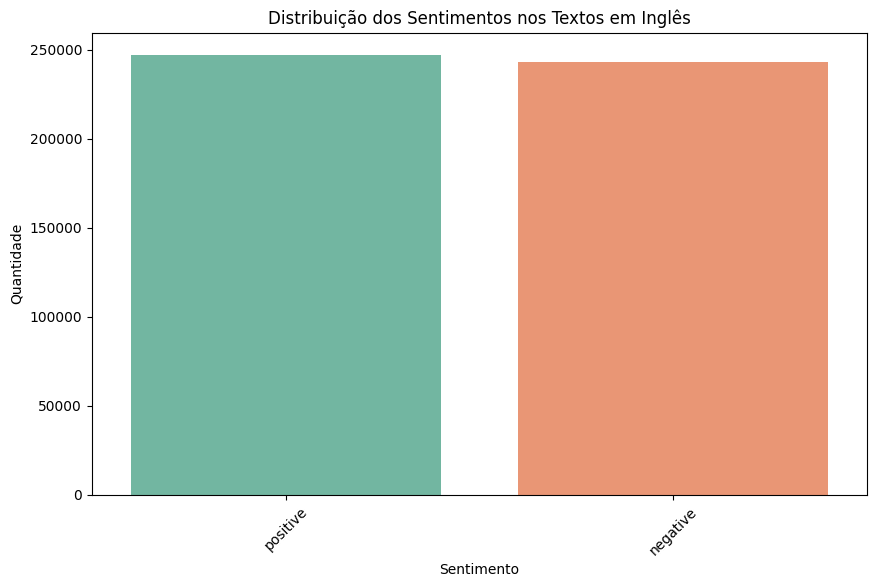

In [96]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Label', data=df_english, palette='Set2')
plt.title('Distribuição dos Sentimentos nos Textos em Inglês')
plt.xlabel('Sentimento')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.show()


Este gráfico de barras reforça o balanceamento entre os rótulos "positive" e "negative" após a filtragem dos dados.

### Word Cloud

Uma Word Cloud é uma representação visual das palavras mais frequentes em um texto. Geramos Word Clouds separadas para os textos positivos e negativos, o que nos permite identificar visualmente as palavras mais proeminentes em cada sentimento.

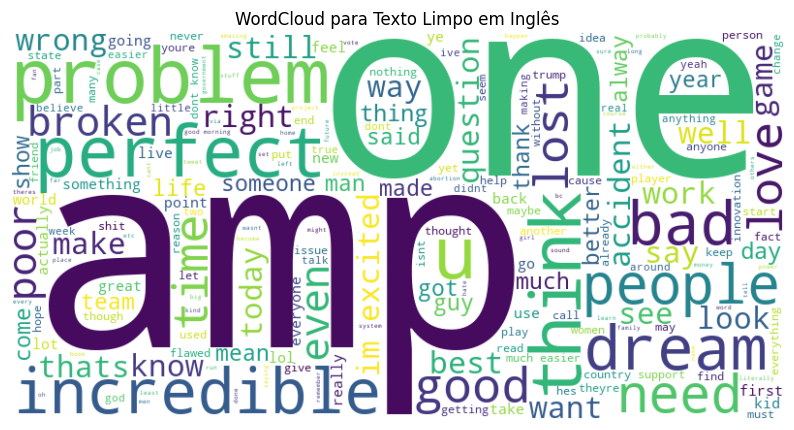

In [97]:
wordcloud = WordCloud(width=800, height=400, background_color ='white').generate(' '.join(df_english['Clean_Text']))
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud para Texto Limpo em Inglês')
plt.show()

A Word Cloud acima mostra as palavras mais frequentes nos textos em inglês, sem distinção de sentimento.

In [106]:
# Geração de texto consolidado para sentimentos positivos e negativos
positive_text = ' '.join(df[df['Label'] == 'positive']['Clean_Text'])
negative_text = ' '.join(df[df['Label'] == 'negative']['Clean_Text'])

# Geração e exibição das Word Clouds
wordcloud_pos = WordCloud(width=800, height=400, background_color ='white').generate(positive_text)
wordcloud_neg = WordCloud(width=800, height=400, background_color ='white').generate(negative_text)

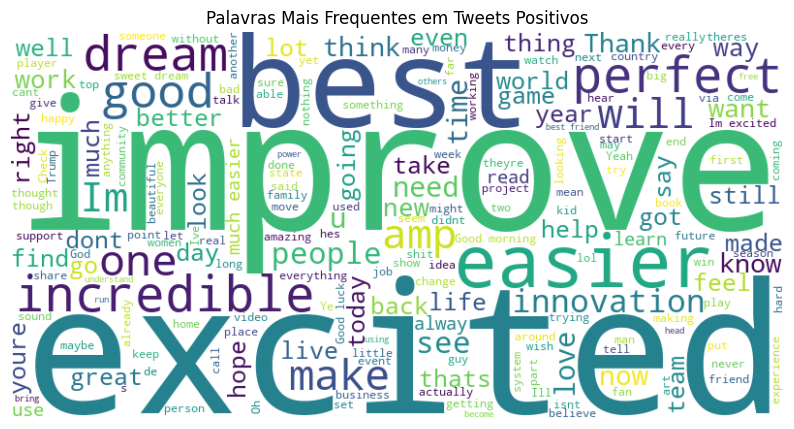

In [107]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.title('Palavras Mais Frequentes em Tweets Positivos')
plt.axis('off')
plt.show() 

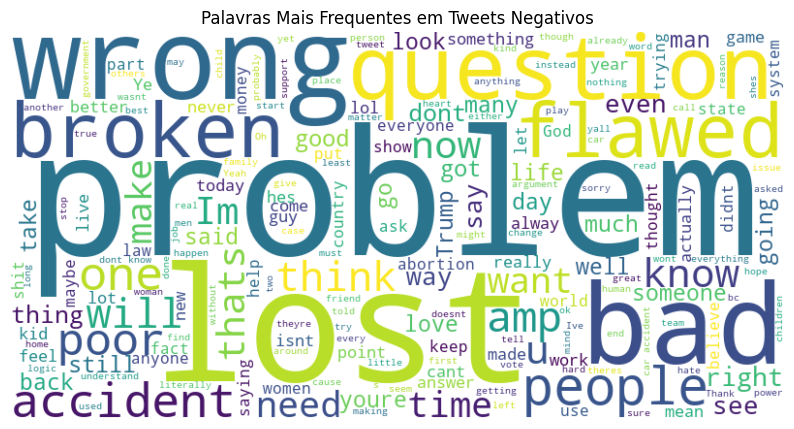

In [108]:
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.title('Palavras Mais Frequentes em Tweets Negativos')
plt.axis('off')
plt.show()

As Word Clouds separadas para tweets positivos e negativos nos permitem comparar as palavras mais proeminentes em cada sentimento, fornecendo insights sobre os tópicos e contextos comuns em cada categoria.

### Boxplot do Comprimento dos Textos
Vamos visualizar a distribuição do comprimento dos textos em inglês para identificar possíveis outliers.

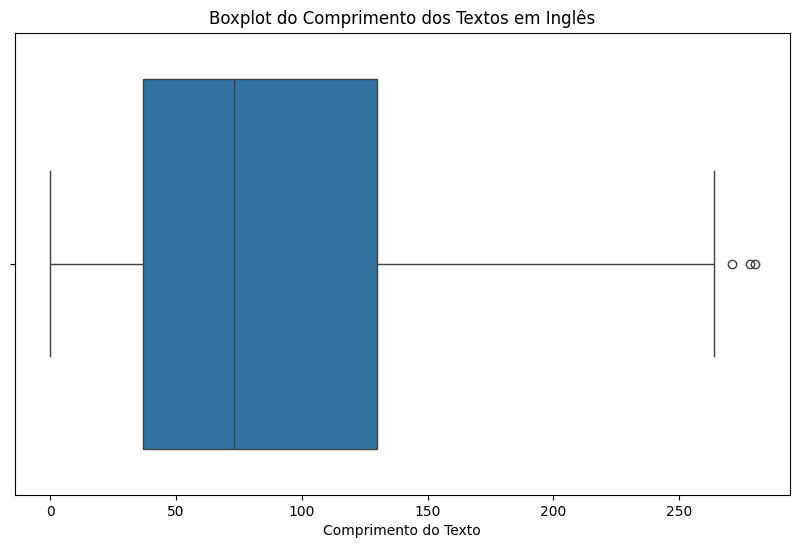

In [100]:
df_english['Text_Length'] = df_english['Clean_Text'].apply(len)
plt.figure(figsize=(10, 6))
sns.boxplot(x='Text_Length', data=df_english)
plt.title('Boxplot do Comprimento dos Textos em Inglês')
plt.xlabel('Comprimento do Texto')
plt.show()


O boxplot acima mostra a distribuição do comprimento dos textos em inglês. Podemos identificar outliers e observar a variabilidade geral no comprimento dos textos.

### Análise de Frequência de Palavras
Análise de frequência de palavras pode fornecer insights quantitativos sobre as palavras mais comuns nos textos.

C:\Users\halex\AppData\Local\Temp\ipykernel_23788\3042820792.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(words), y=list(counts), palette='viridis')


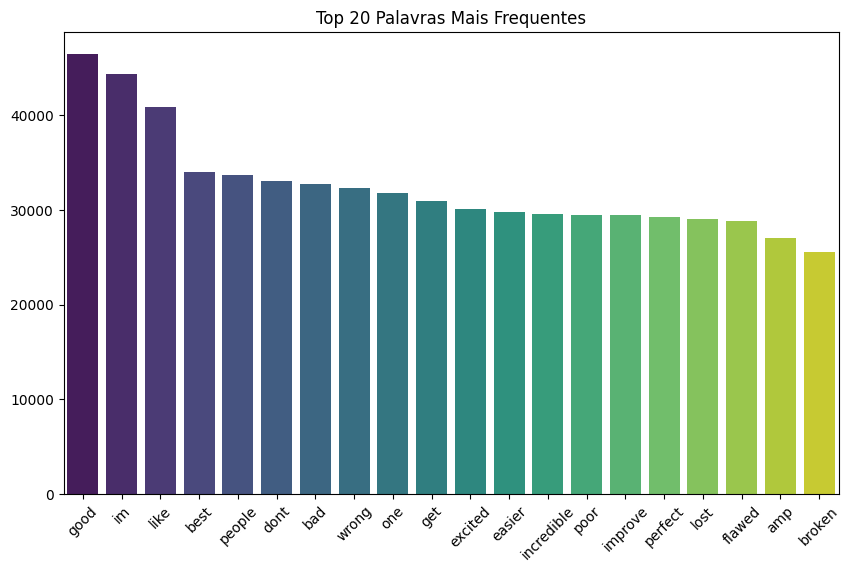

In [101]:
from collections import Counter

# Contar as palavras nos textos limpos
word_counts = Counter(" ".join(df_english['Clean_Text']).split())
most_common_words = word_counts.most_common(20)

# Plotar as palavras mais comuns
plt.figure(figsize=(10, 6))
words, counts = zip(*most_common_words)
sns.barplot(x=list(words), y=list(counts), palette='viridis')
plt.title('Top 20 Palavras Mais Frequentes')
plt.xticks(rotation=45)
plt.show()


Este gráfico de barras apresenta as 20 palavras mais frequentes nos textos em inglês. Essa análise pode fornecer insights sobre os tópicos e contextos mais comuns presentes no conjunto de dados.

### Análise de Sentimentos vs. Comprimento do Texto
Explorar a relação entre o sentimento dos textos e o seu comprimento pode revelar se textos mais longos tendem a ser mais positivos, negativos, etc.

C:\Users\halex\AppData\Local\Temp\ipykernel_23788\3304656567.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Label', y='Text_Length', data=df_english, palette='coolwarm')


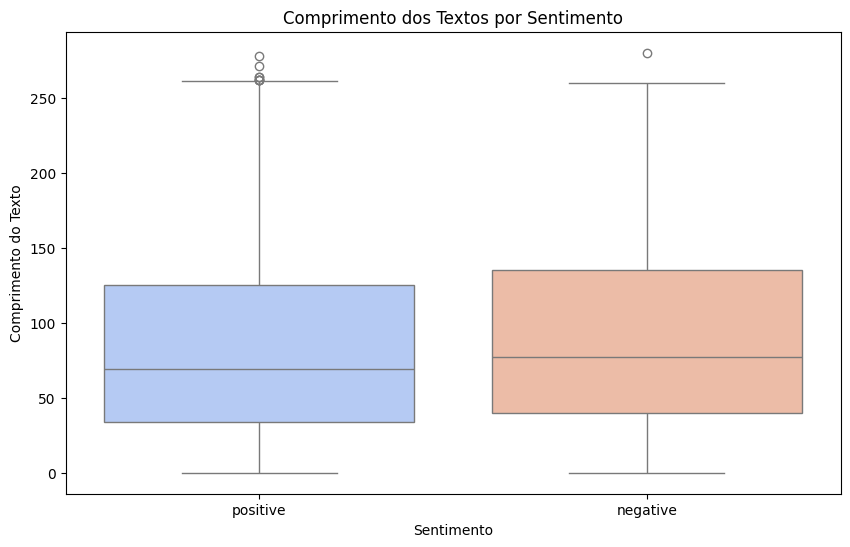

In [102]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Label', y='Text_Length', data=df_english, palette='coolwarm')
plt.title('Comprimento dos Textos por Sentimento')
plt.xlabel('Sentimento')
plt.ylabel('Comprimento do Texto')
plt.show()


Este boxplot explora a relação entre o sentimento dos textos (positivo ou negativo) e o comprimento do texto. Podemos observar se existe uma tendência de textos mais longos ou mais curtos serem associados a um sentimento específico.

### Análise de Bigramas e Trigramas
Analisar as combinações mais comuns de duas ou três palavras pode ajudar a entender os contextos específicos dentro dos textos.

C:\Users\halex\AppData\Local\Temp\ipykernel_23788\4067219095.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=y, y=x, palette='plasma')


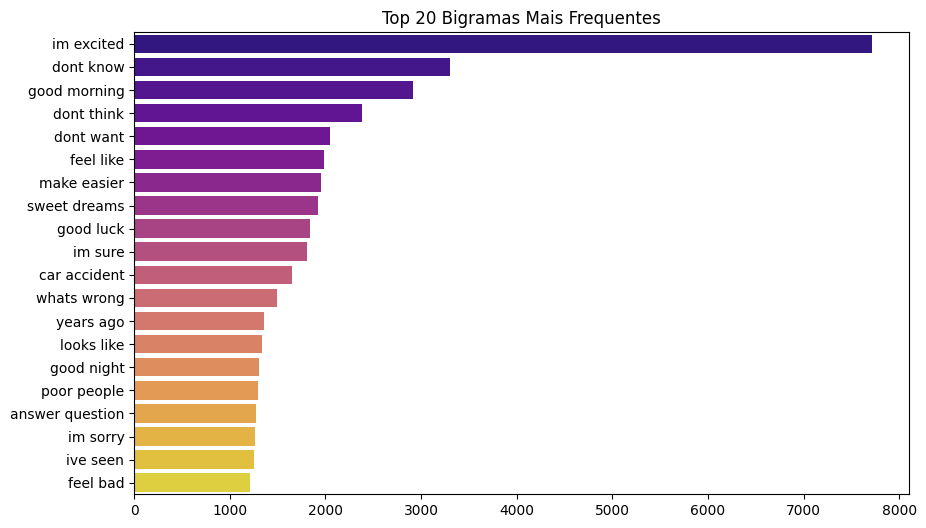

In [103]:
from sklearn.feature_extraction.text import CountVectorizer

def get_top_ngram(corpus, n=None, ngram_range=(2, 2)):
    vec = CountVectorizer(stop_words='english', ngram_range=ngram_range).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
    return words_freq[:n]

top_bigrams = get_top_ngram(df_english['Clean_Text'], n=20, ngram_range=(2, 2))

# Plotar os bigramas mais comuns
plt.figure(figsize=(10, 6))
x,y = map(list,zip(*top_bigrams))
sns.barplot(x=y, y=x, palette='plasma')
plt.title('Top 20 Bigramas Mais Frequentes')
plt.show()

A análise de bigramas e trigramas nos permite identificar as combinações mais comuns de duas ou três palavras nos textos. Este gráfico de barras mostra os 20 bigramas mais frequentes, o que pode fornecer insights sobre os contextos e tópicos específicos presentes nos dados.

### Análise de Densidade e Distribuição
Para entender melhor a distribuição do comprimento dos textos, uma análise de densidade pode complementar o boxplot.

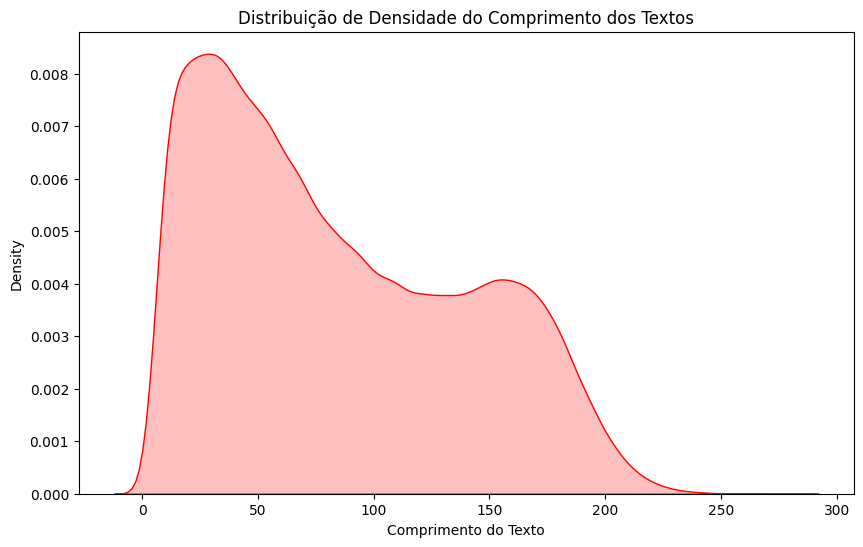

In [104]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_english['Text_Length'], fill=True, color='r')
plt.title('Distribuição de Densidade do Comprimento dos Textos')
plt.xlabel('Comprimento do Texto')
plt.show()


O gráfico de densidade complementa a análise do comprimento dos textos, fornecendo uma visualização mais detalhada da distribuição subjacente dos dados. Isso pode ajudar a identificar eventuais desvios ou assimetrias na distribuição.